In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_EffNet5_b5_1FC_cross_15AB_15AB.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
# os.chdir( '/home/yupaporn/codes/result_model')
# testdf = dataset
# testdf.to_csv('FVtest_RF_15AB_1FC_3.csv')

In [5]:
# dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FeaturesVector_val_EffNet5_b5_1FC_cross_15AB.csv')
dataframe = pd.read_csv('/home/yupaporn/codes/result_model/FVtest_RF_15AB_1FC_3.csv')
# X_test = dataframe.iloc[:,1:2049]
# y_test = dataframe.iloc[:,2052]
# print(X_test.shape)
# print(y_test.shape)

In [6]:
# Normal=dataframe[dataframe['Class']=='Normal']
# Abnormal=dataframe[dataframe['Class']=='Abnormal']

### Abnormal

In [7]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [8]:
print(y_test[0])

AB01


In [9]:
# dataframe

In [10]:
# X_test

In [11]:
# np.argmax(y_prob[10])

In [12]:
labels = {0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}

In [13]:
pred_list = list()
prob_list = list()
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
for i in range(0,len(y_prob)):
    result = y_prob[i]
    re_class = list()
    re_prop = list()  
    maxx = np.argmax(result)
    re_class=labels[maxx]
    re_prop = result[14]
    pred_list.append(re_class)
    prob_list.append(re_prop)

In [14]:
pred_list[10]

'AB04'

In [15]:
prob_list[0]

0.4130348595839314

In [16]:
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

In [17]:
dataframe.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,category,Prob
0,0,-0.107834,0.312153,0.017337,-0.183516,0.575317,-0.173991,-0.089335,-0.063324,-0.030139,...,0.148072,0.400463,0.140204,0.374979,Abnormal,P1,FP-A,AB01,Normal,0.413035
1,1,0.410596,0.660919,-0.136564,-0.185140,0.411923,-0.167171,0.004935,0.000345,-0.130163,...,-0.012627,0.236496,0.633178,0.092445,Abnormal,P2,FP-A,AB01,AB01,0.110668
2,2,-0.017506,0.345108,0.225856,-0.165460,0.779618,-0.193235,-0.032824,-0.147712,-0.096544,...,-0.005355,0.241840,0.390013,-0.130200,Abnormal,P41,FP-B,AB01,AB02,0.091490
3,3,-0.020903,0.117675,-0.082832,-0.135977,0.282651,-0.220009,0.111933,-0.094878,-0.103359,...,0.022169,0.057336,0.233832,-0.014271,Abnormal,P51,FP-C,AB01,AB01,0.075286
4,4,0.064263,0.339077,0.294470,-0.157962,0.194468,-0.202357,-0.088951,-0.190239,-0.139355,...,-0.076772,0.139161,0.083017,-0.109640,Abnormal,P31,FP-B,AB01,AB02,0.065060


In [18]:
# os.chdir( '/home/yupaporn/codes/result_model')
# testdf = dataframe
# testdf.to_csv('ResultEffNetRf_15AB_Testset_1FC_3_.csv')

In [19]:
p1 = dataframe
act= p1['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
pred = p1['category'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       857
           1       0.99      0.80      0.88       455

    accuracy                           0.93      1312
   macro avg       0.94      0.90      0.91      1312
weighted avg       0.93      0.93      0.92      1312



Text(0.5, 21.5, 'Predicted label')

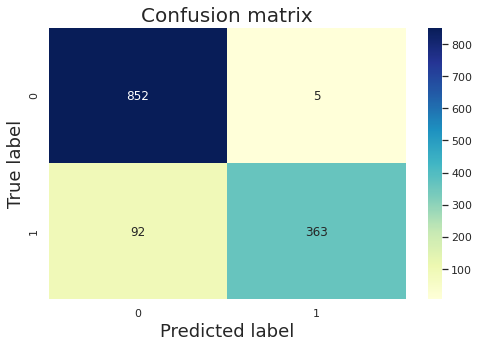

In [20]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df0 = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df0['Actual'],df0['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [21]:
cm

array([[852,   5],
       [ 92, 363]])

In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=" "

In [23]:
import pandas as pd
df = pd.read_csv (r'/home/yupaporn/codes/result_model/ResultEffNetRf_15AB_Testset_1FC_3_.csv')
print(df .shape)

(1312, 2056)


In [24]:
dataframe=df

In [25]:
data_train = df
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Sub_class'])
print('Actual : ',len(classe))
print(classe)

Predicted :  15
{'AB07', 'AB01', 'AB081', 'AB10', 'AB12', 'AB11', 'AB082', 'AB083', 'AB06', 'AB09', 'AB04', 'AB02', 'AB03', 'AB05', 'Normal'}
Actual :  15
{'AB07', 'AB01', 'AB081', 'AB10', 'AB12', 'AB11', 'AB082', 'AB083', 'AB06', 'AB09', 'AB04', 'AB02', 'AB03', 'AB05', 'Normal'}


In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
pred = data_train['category'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.60670731707317%
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       857
           1       0.99      0.80      0.88       455

    accuracy                           0.93      1312
   macro avg       0.94      0.90      0.91      1312
weighted avg       0.93      0.93      0.92      1312



# Threshold 

In [24]:
# data_train

In [25]:
# data_train['Prob'][0]

In [27]:
def confusion_matrix_all_new(data_train,threshold):

    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table   
    act= p1['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
    
    import numpy as np
    n = len(p1)
    proplist = list()
    for i in range(0,n):
        score = p1.iloc[i].to_numpy()
#         print(score[2055])
        proplist.append(1 - score[2055])
            

    prob_all =np.array(proplist)
# 3. threshold ----------------------------------------------------------------


    import numpy as np
    from sklearn.metrics import confusion_matrix
    
    t = prob_all >= threshold
    #replace
    ts =t.tolist()
    alist =list()
    for i in range(0,len(ts)):
        if ts[i]==  True:
            a = 1
            alist.append(a)
        else:
            a = 0
            alist.append(a)

    tn, fp, fn, tp = confusion_matrix(act, alist).ravel()

    print('(TN,FP,FN,TP)')
    print('(',tn,',', fp,',', fn,',', tp,')')
    return tn, fp, fn, tp

In [28]:
#Test function
data_train = dataframe
threshold = 0.5
confusion_matrix_all_new(data_train,threshold)

(TN,FP,FN,TP)
( 823 , 34 , 36 , 419 )


(823, 34, 36, 419)

In [ ]:
import numpy as np
threshold = np.arange(0.0, 1.002, 0.0001)
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()
TN0, FP0, FN0, TP0 = list(),list(),list(),list()
for i in threshold:
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    tn,fp,fn,tp = confusion_matrix_all_new(data_train,i) 
    try:
        pre = tp/(tp+fp)
        re= tp/(tp+fn)
        acc = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        spec = 1-(tn/(tn+fp))
    except ZeroDivisionError:
        pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
    TP0.append(tp)
    TN0.append(tn)
    FP0.append(fp)
    FN0.append(fn)
    precision0.append(pre)
    recall0.append(re)
    ACC0.append(acc)
    TPR0.append(re)
    FPR0.append(fpr)       
    SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

(TN,FP,FN,TP)
( 0 , 857 , 0 , 455 )
(TN,FP,FN,TP)
( 434 , 423 , 1 , 454 )
(TN,FP,FN,TP)
( 434 , 423 , 1 , 454 )
(TN,FP,FN,TP)
( 434 , 423 , 1 , 454 )
(TN,FP,FN,TP)
( 434 , 423 , 1 , 454 )
(TN,FP,FN,TP)
( 436 , 421 , 1 , 454 )
(TN,FP,FN,TP)
( 437 , 420 , 1 , 454 )
(TN,FP,FN,TP)
( 438 , 419 , 1 , 454 )
(TN,FP,FN,TP)
( 438 , 419 , 1 , 454 )
(TN,FP,FN,TP)
( 438 , 419 , 1 , 454 )
(TN,FP,FN,TP)
( 438 , 419 , 1 , 454 )
(TN,FP,FN,TP)
( 441 , 416 , 1 , 454 )
(TN,FP,FN,TP)
( 441 , 416 , 1 , 454 )
(TN,FP,FN,TP)
( 441 , 416 , 1 , 454 )
(TN,FP,FN,TP)
( 441 , 416 , 1 , 454 )
(TN,FP,FN,TP)
( 441 , 416 , 1 , 454 )
(TN,FP,FN,TP)
( 441 , 416 , 1 , 454 )
(TN,FP,FN,TP)
( 443 , 414 , 1 , 454 )
(TN,FP,FN,TP)
( 443 , 414 , 1 , 454 )
(TN,FP,FN,TP)
( 443 , 414 , 1 , 454 )
(TN,FP,FN,TP)
( 445 , 412 , 1 , 454 )
(TN,FP,FN,TP)
( 447 , 410 , 1 , 454 )
(TN,FP,FN,TP)
( 452 , 405 , 1 , 454 )
(TN,FP,FN,TP)
( 456 , 401 , 1 , 454 )
(TN,FP,FN,TP)
( 460 , 397 , 1 , 454 )
(TN,FP,FN,TP)
( 499 , 358 , 3 , 452 )
(TN,FP,FN,TP)


(TN,FP,FN,TP)
( 620 , 237 , 4 , 451 )
(TN,FP,FN,TP)
( 621 , 236 , 4 , 451 )
(TN,FP,FN,TP)
( 622 , 235 , 4 , 451 )
(TN,FP,FN,TP)
( 622 , 235 , 4 , 451 )
(TN,FP,FN,TP)
( 622 , 235 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 623 , 234 , 4 , 451 )
(TN,FP,FN,TP)
( 624 , 233 , 4 , 451 )
(TN,FP,FN,TP)
( 624 , 233 , 4 , 451 )
(TN,FP,FN,TP)
( 624 , 233 , 4 , 451 )
(TN,FP,FN,TP)
( 624 , 233 , 4 , 451 )
(TN,FP,FN,TP)
( 624 , 233 , 4 , 451 )
(TN,FP,FN,TP)
( 625 , 232 , 4 , 451 )
(TN,FP,FN,TP)
( 625 , 232 , 4 , 451 )
(TN,FP,FN,TP)
( 625 , 232 , 4 , 451 )
(TN,FP,FN,TP)
( 625 , 232 , 4 , 451 )
(TN,FP,FN,TP)
( 625 , 232 , 4 , 451 )
(TN,FP,FN,TP)
( 625 , 232 , 4 , 451 )
(TN,FP,FN,TP)
( 625 , 232 , 4 , 451 )
(TN,FP,FN,TP)
( 628 , 229 , 4 , 451 )
(TN,FP,FN,TP

(TN,FP,FN,TP)
( 659 , 198 , 5 , 450 )
(TN,FP,FN,TP)
( 659 , 198 , 5 , 450 )
(TN,FP,FN,TP)
( 659 , 198 , 5 , 450 )
(TN,FP,FN,TP)
( 660 , 197 , 5 , 450 )
(TN,FP,FN,TP)
( 660 , 197 , 5 , 450 )
(TN,FP,FN,TP)
( 660 , 197 , 5 , 450 )
(TN,FP,FN,TP)
( 661 , 196 , 5 , 450 )
(TN,FP,FN,TP)
( 661 , 196 , 5 , 450 )
(TN,FP,FN,TP)
( 661 , 196 , 5 , 450 )
(TN,FP,FN,TP)
( 661 , 196 , 5 , 450 )
(TN,FP,FN,TP)
( 662 , 195 , 5 , 450 )
(TN,FP,FN,TP)
( 662 , 195 , 5 , 450 )
(TN,FP,FN,TP)
( 662 , 195 , 5 , 450 )
(TN,FP,FN,TP)
( 662 , 195 , 5 , 450 )
(TN,FP,FN,TP)
( 662 , 195 , 5 , 450 )
(TN,FP,FN,TP)
( 662 , 195 , 5 , 450 )
(TN,FP,FN,TP)
( 663 , 194 , 5 , 450 )
(TN,FP,FN,TP)
( 664 , 193 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP)
( 665 , 192 , 5 , 450 )
(TN,FP,FN,TP

(TN,FP,FN,TP)
( 682 , 175 , 5 , 450 )
(TN,FP,FN,TP)
( 682 , 175 , 5 , 450 )
(TN,FP,FN,TP)
( 682 , 175 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 683 , 174 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP)
( 684 , 173 , 5 , 450 )
(TN,FP,FN,TP

(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 695 , 162 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 696 , 161 , 7 , 448 )
(TN,FP,FN,TP)
( 697 , 160 , 7 , 448 )
(TN,FP,FN,TP)
( 697 , 160 , 7 , 448 )
(TN,FP,FN,TP)
( 697 , 160 , 7 , 448 )
(TN,FP,FN,TP)
( 697 , 160 , 7 , 448 )
(TN,FP,FN,TP)
( 697 , 160 , 7 , 448 )
(TN,FP,FN,TP

(TN,FP,FN,TP)
( 713 , 144 , 8 , 447 )
(TN,FP,FN,TP)
( 713 , 144 , 8 , 447 )
(TN,FP,FN,TP)
( 713 , 144 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 714 , 143 , 8 , 447 )
(TN,FP,FN,TP)
( 715 , 142 , 8 , 447 )
(TN,FP,FN,TP)
( 715 , 142 , 8 , 447 )
(TN,FP,FN,TP)
( 715 , 142 , 8 , 447 )
(TN,FP,FN,TP)
( 715 , 142 , 8 , 447 )
(TN,FP,FN,TP)
( 715 , 142 , 8 , 447 )
(TN,FP,FN,TP)
( 715 , 142 , 8 , 447 )
(TN,FP,FN,TP)
( 715 , 142 , 8 , 447 )
(TN,FP,FN,TP

(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 724 , 133 , 10 , 445 )
(TN,FP,FN,TP)
( 725 , 132 , 10 , 445 )
(TN,FP,FN,TP)
( 725 , 132 , 10 , 445 )
(TN,FP,FN,TP)
( 725 , 132 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131 , 10 , 445 )
(TN,FP,FN,TP)
( 726 , 131

(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 735 , 122 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121 , 10 , 445 )
(TN,FP,FN,TP)
( 736 , 121

(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111 , 13 , 442 )
(TN,FP,FN,TP)
( 746 , 111

(TN,FP,FN,TP)
( 756 , 101 , 14 , 441 )
(TN,FP,FN,TP)
( 756 , 101 , 14 , 441 )
(TN,FP,FN,TP)
( 756 , 101 , 14 , 441 )
(TN,FP,FN,TP)
( 756 , 101 , 14 , 441 )
(TN,FP,FN,TP)
( 758 , 99 , 14 , 441 )
(TN,FP,FN,TP)
( 758 , 99 , 14 , 441 )
(TN,FP,FN,TP)
( 758 , 99 , 14 , 441 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 758 , 99 , 15 , 440 )
(TN,FP,FN,TP)
( 759 , 98 , 15 , 440 )
(TN,FP,FN,TP)
( 759 , 98 , 15 , 440 )
(TN,FP,FN,TP)
( 759 , 98 , 15 , 440 )
(TN,FP,FN,TP)
( 760 , 97 , 15 , 440 )
(TN,FP,FN,TP)
( 760 , 97 , 15 , 440 )
(TN,FP,FN,TP)
( 760 , 97 , 15 , 440 )
(TN,FP,FN,TP)
( 760 , 97 , 15 , 440 )
(TN,FP,FN,TP)
( 760 , 97 , 15 , 440 )
(TN,FP,FN,TP)
( 760 , 97 , 16 , 439 )
(TN,FP,F

(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP)
( 763 , 94 , 16 , 439 )
(TN,FP,FN,TP

In [ ]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [ ]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),
                     'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i), 
                     'TN' : pd.Series(TN0, index = i), 'FP' : pd.Series(FP0, index = i), 'FN' : pd.Series(FN0, index = i), 'TP' : pd.Series(TP0, index = i)},)
roc0 = roc0.fillna(1)

In [ ]:
#sen VS spec
import numpy as np
import matplotlib.pyplot as plt
sen= np.array(roc0['tpr'])
spec = np.array(roc0['1-Spec'])
# from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
plt.plot([0, 0],[1, 1],'c', linestyle='--',lw=2.5)
plt.plot(spec,sen,'b', marker='.',lw=lw)  
    # axis labels
plt.xlabel('1-Specificity',fontsize=18)
plt.ylabel('Sensitivity',fontsize=18)
plt.title('Sensitivity & 1-Specificity',fontsize=20)
    # show the legend
plt.legend()
    # show the plot
plt.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(spec, sen)
print('PR AUC (area = %0.2f)' % (auc_score))

In [ ]:
#Precision & Recall Curve
import numpy as np
recall = np.array(roc0['Recall'])
precision = np.array(roc0['Precision'])

import matplotlib.pyplot as plt
from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
fig.patch.set_facecolor('w')
plt.plot([0, 1], [0.5, 0.5],'c', linestyle='--',lw=2.5)
pyplot.plot(recall, precision,'b', marker='.', lw=lw)
    # axis labels
pyplot.xlabel('Recall',fontsize=18)
pyplot.ylabel('Precision',fontsize=18)
pyplot.title('Precision & Recall',fontsize=20)
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('PR AUC (area = %0.2f)' % (auc_score))

In [ ]:
#Select the best threshold
FN_min = roc0[roc0.FN == roc0.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

In [ ]:
#Select the best threshold
FN_min = roc0[roc0.FN != 0]
FN_min_ = FN_min[FN_min.FN == FN_min.FN.min()]
# FN_min = roc0[roc0.FN == roc0.FN.min()]
FN_min__ = FN_min_[FN_min_.FP == FN_min_.FP.min()]
FN_min__

In [ ]:
threshold = FN_min__['Threshold'].tolist()[0]
threshold

In [49]:

    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table   
    act= p1['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
    
    import numpy as np
    n = len(p1)
    proplist = list()
    for i in range(0,n):
        score = p1.iloc[i].to_numpy()
        proplist.append(1 - score[2054])
            

    prob_all =np.array(proplist)
# 3. threshold ----------------------------------------------------------------


    import numpy as np
    from sklearn.metrics import confusion_matrix
    
    t = prob_all >= threshold
    #replace
    ts =t.tolist()
    alist =list()
    for i in range(0,len(ts)):
        if ts[i]==  True:
            a = 1
            alist.append(a)
        else:
            a = 0
            alist.append(a)

    tn, fp, fn, tp = confusion_matrix(act, alist).ravel()

    print('(TN,FP,FN,TP)')
    print('(',tn,',', fp,',', fn,',', tp,')')

(TN,FP,FN,TP)
( 338 , 91 , 1 , 226 )


In [50]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, alist))#performance

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       429
           1       0.71      1.00      0.83       227

    accuracy                           0.86       656
   macro avg       0.85      0.89      0.86       656
weighted avg       0.90      0.86      0.86       656

